In [11]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


## Activity 1

### Plot data sets for N=10, N=100, N=1000

In [12]:
N1 = 10
N2 = 100
N3 = 1000

# Generate x (uniform distribution between 0 and 1)
xvals_N1 = np.linspace(0,1,N1)
xvals_N2 = np.linspace(0,1,N2)
xvals_N3 = np.linspace(0,1,N3)

# Generate function
yvals_N1 = np.sin(2 * np.pi* xvals_N1)
yvals_N2 = np.sin(2 * np.pi* xvals_N2)
yvals_N3 = np.sin(2 * np.pi* xvals_N3)

In [13]:
# Add Gaussian noise
noise1 = np.random.normal(0,0.3,N1)
noise2 = np.random.normal(0,0.3,N2)
noise3 = np.random.normal(0,0.3,N3)

noisy_yvals1 = yvals_N1 + noise1
noisy_yvals2 = yvals_N2 + noise2
noisy_yvals3 = yvals_N3 + noise3


<function matplotlib.pyplot.show(close=None, block=None)>

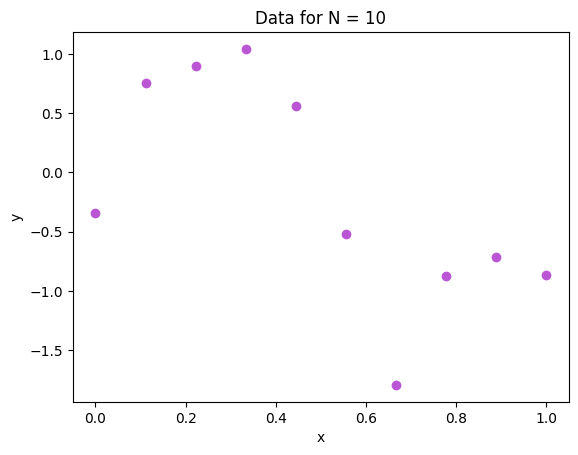

In [14]:
# Plot y vs. x
#plt.scatter(xvals_N1, yvals_N1, label="clean signal", color="hotpink")
plt.scatter(xvals_N1, noisy_yvals1, label="noisy signal", color="mediumorchid")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data for N = 10")
#plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

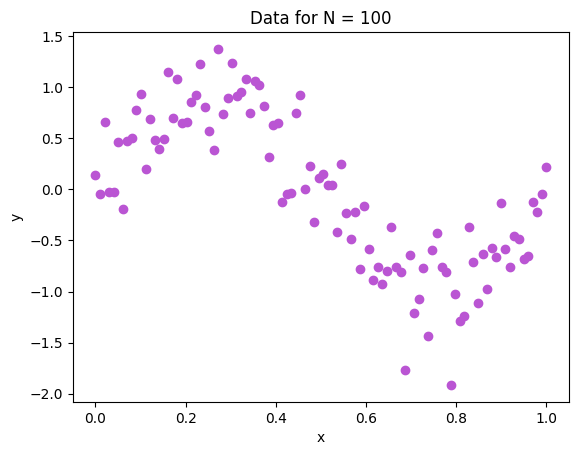

In [15]:
#plt.scatter(xvals_N2, yvals_N2, label="clean signal", color="hotpink")
plt.scatter(xvals_N2, noisy_yvals2, label="noisy signal", color="mediumorchid")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data for N = 100")
#plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

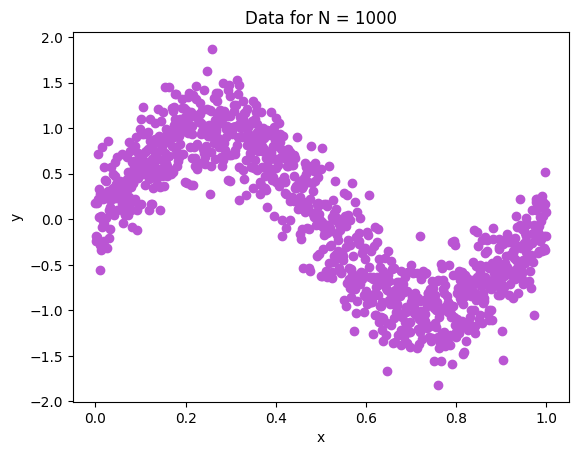

In [16]:
#plt.scatter(xvals_N3, yvals_N3, label="clean signal", color="hotpink")
plt.scatter(xvals_N3, noisy_yvals3, label="noisy signal", color="mediumorchid")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data for N = 1000")
#plt.legend()
plt.show

### Polynomial fit to target data set with polynomials 1-9

In [26]:
def plot_polynomial(x, y):
    x_plot = np.linspace(0, 1, 1000)

    for degree in range(1, 10):
        coefficients = np.polyfit(x, y, degree)

        y_fit = []
        for j in range(len(x_plot)):
            x_iteration = x_plot[j]
            y_fitted = 0
            for i in range(degree + 1):
                y_fitted += coefficients[i] * (x_iteration)**(degree - i)
            y_fit.append(y_fitted)

        plt.figure()
        plt.scatter(x, y, color="mediumorchid", label='data') #these are from the original dataset
        plt.plot(x_plot, y_fit, color="hotpink", label=f'degree {degree}') #these values are from the polynomial fit
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(f'Polynomial fit (degree {degree})')
        plt.legend()
        plt.show()

#### For N = 10

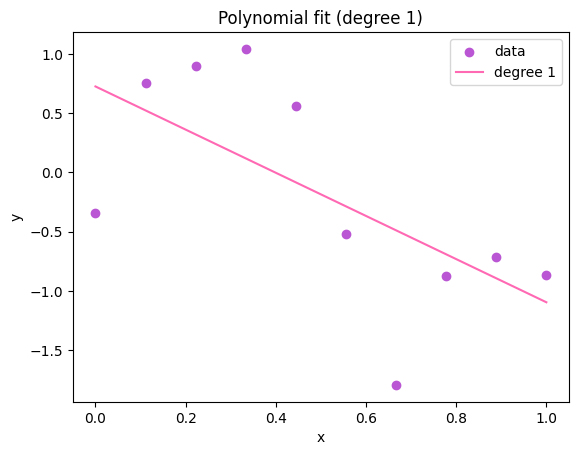

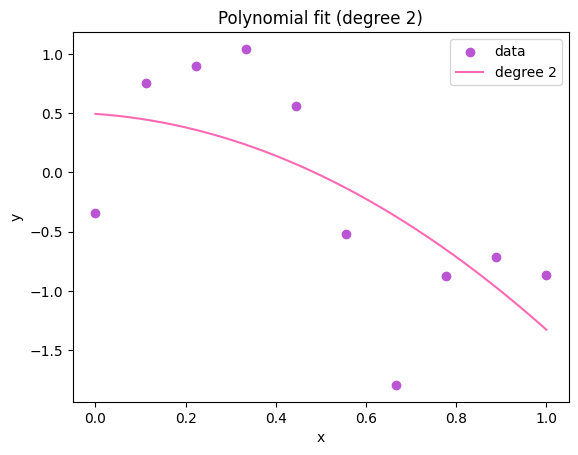

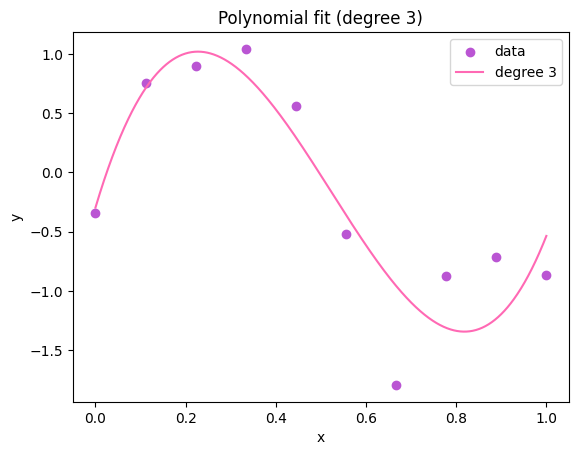

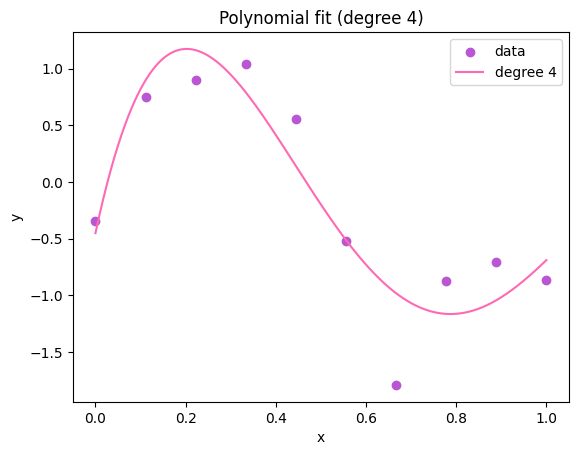

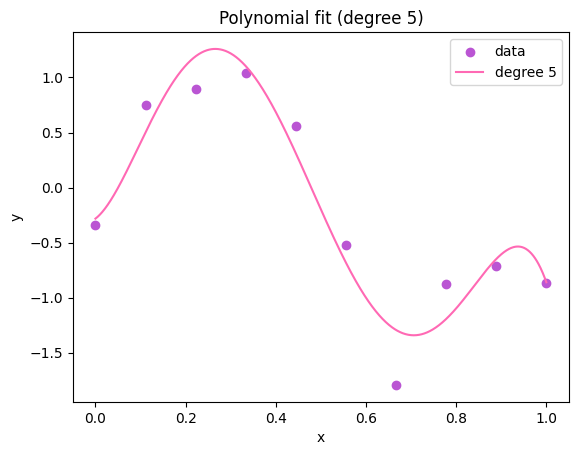

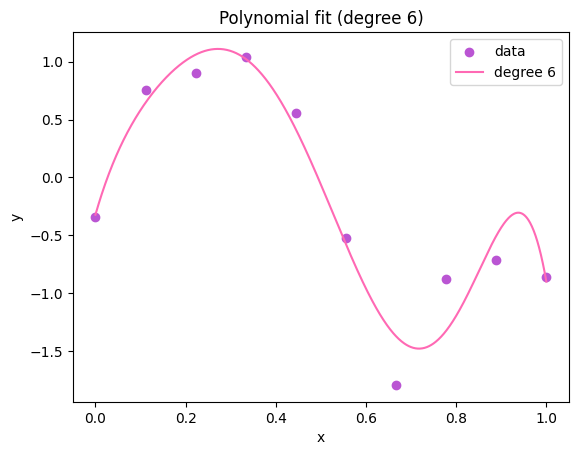

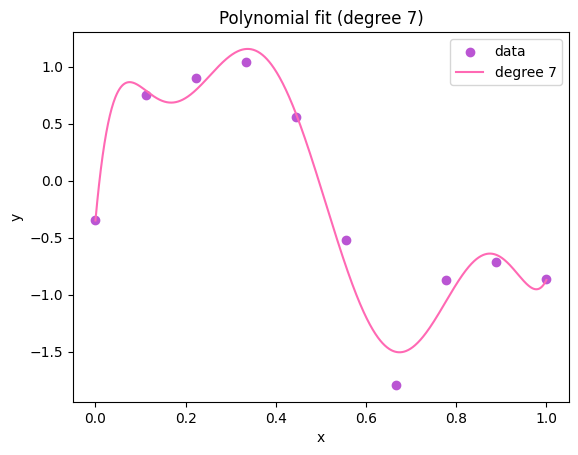

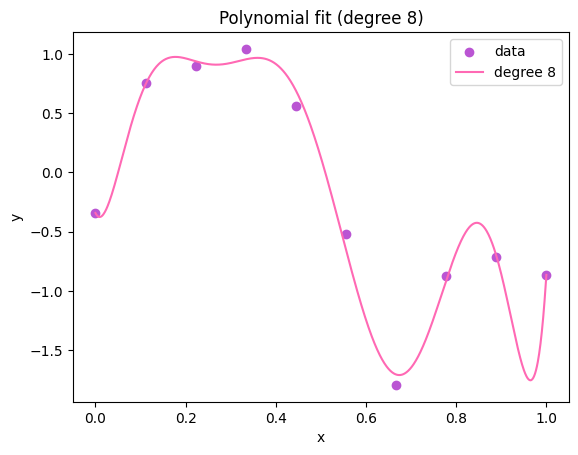

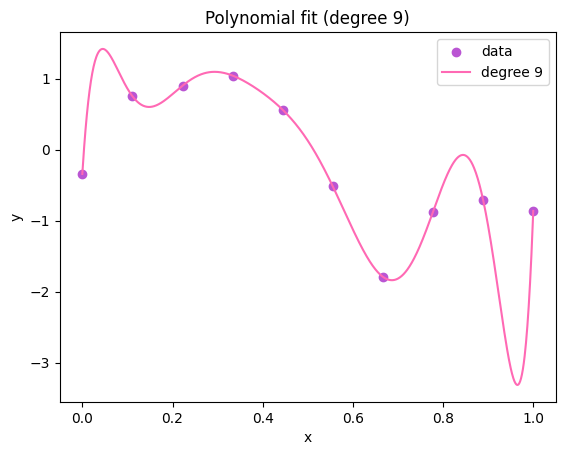

In [27]:
plot_polynomial(xvals_N1, noisy_yvals1)


#### For N = 100

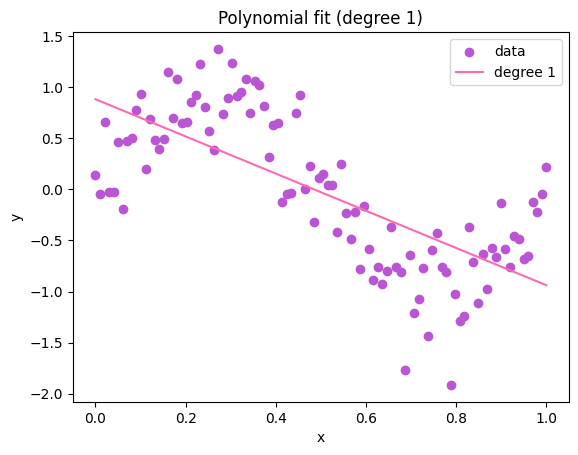

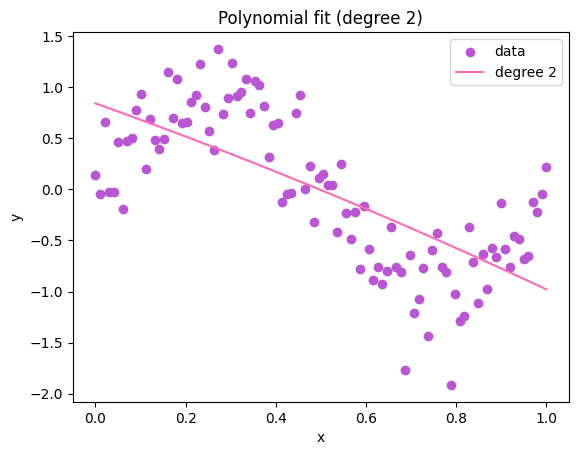

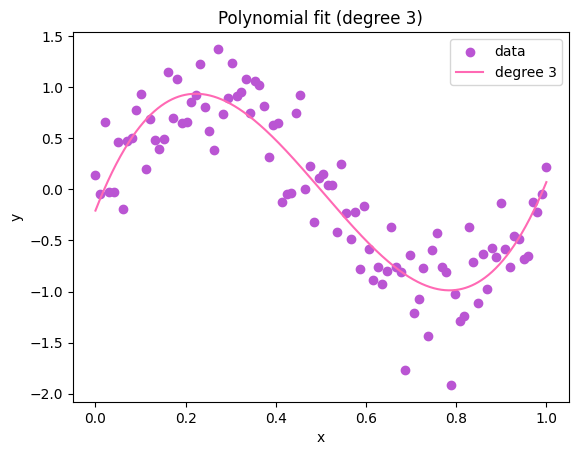

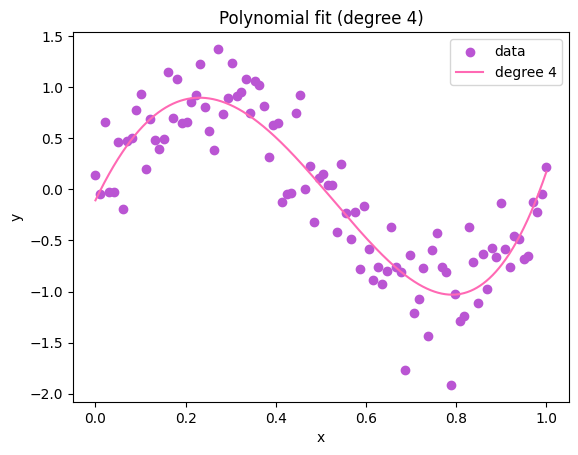

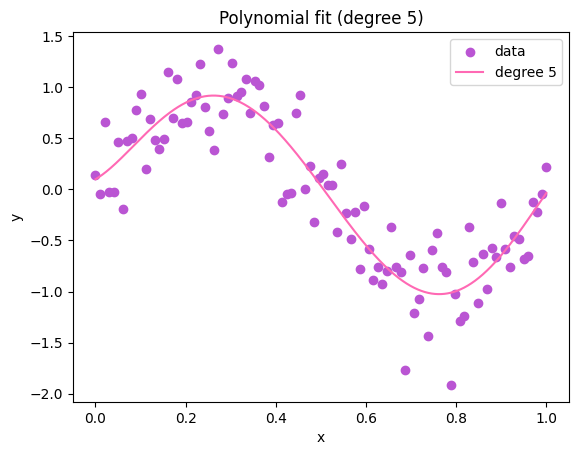

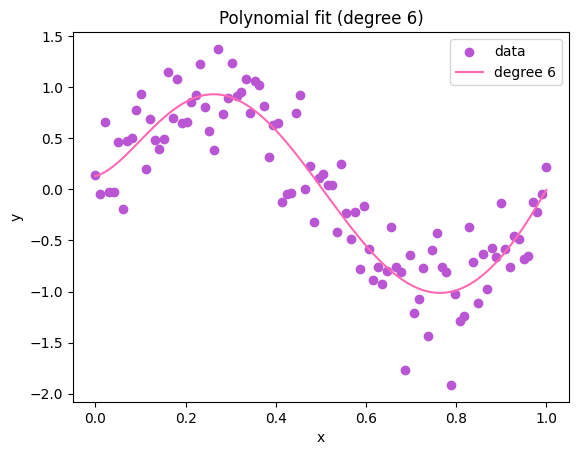

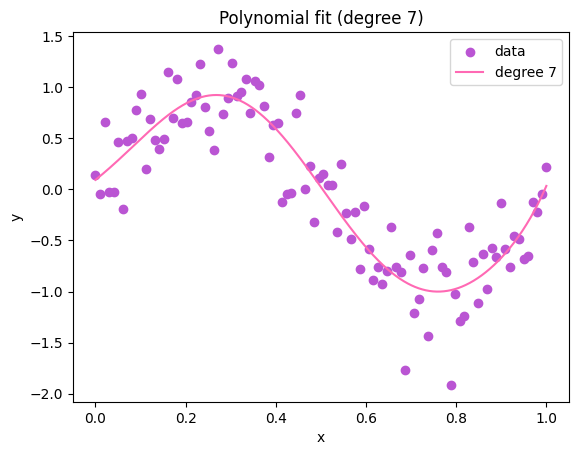

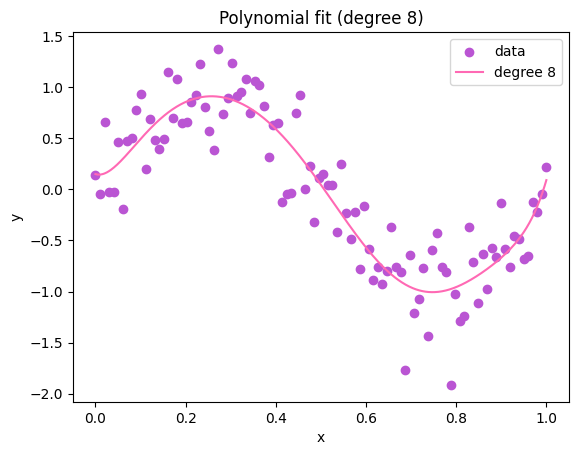

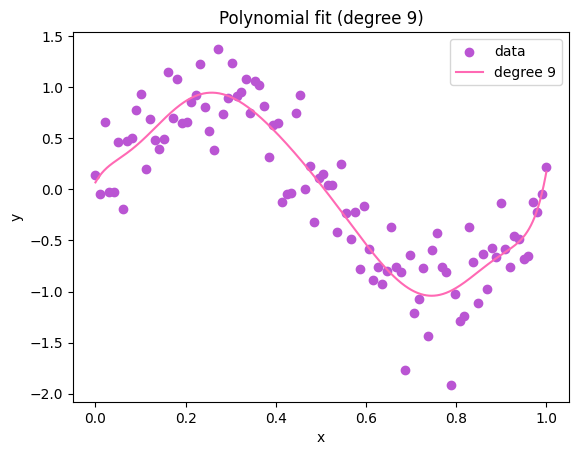

In [28]:
plot_polynomial(xvals_N2, noisy_yvals2)

#### For N = 1000

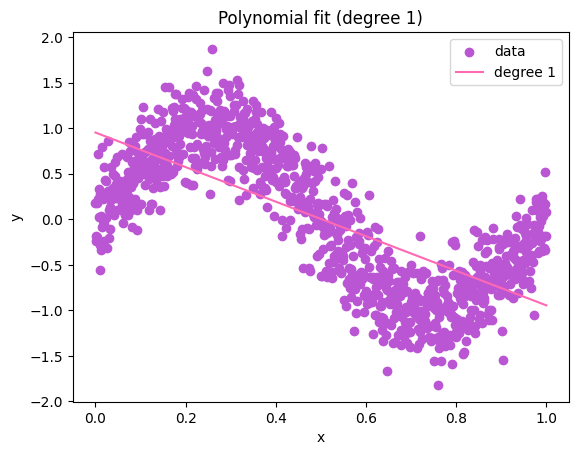

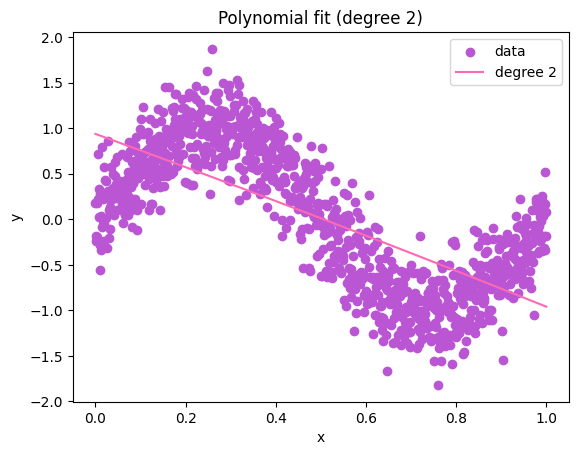

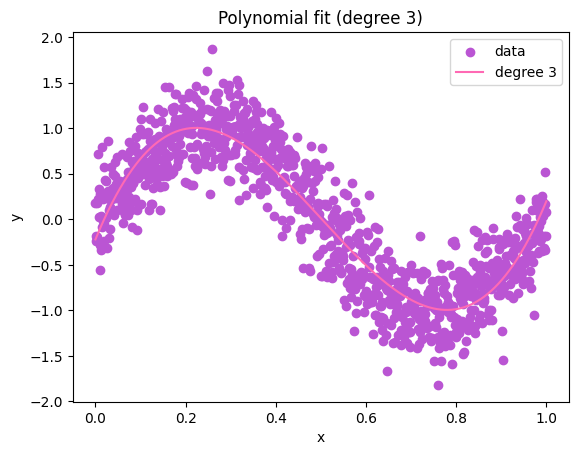

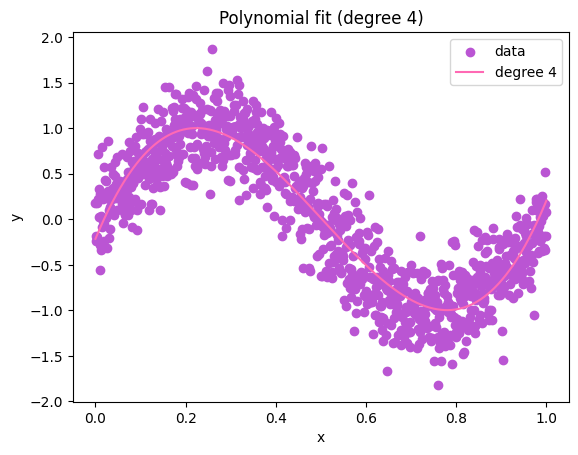

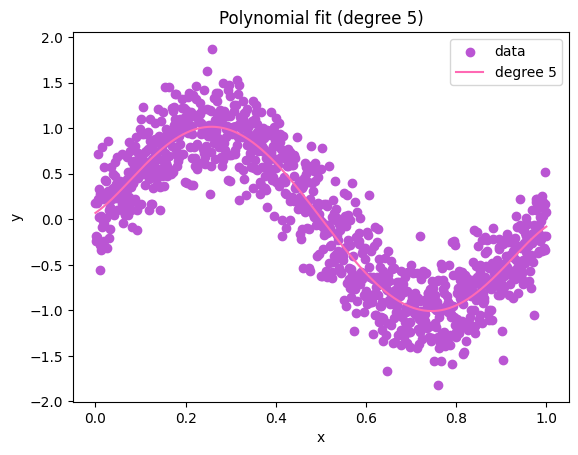

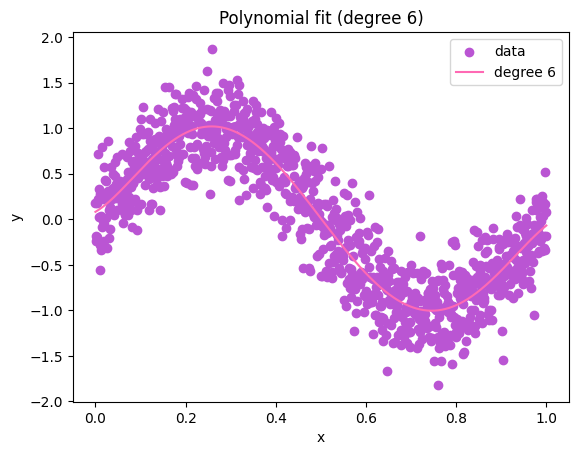

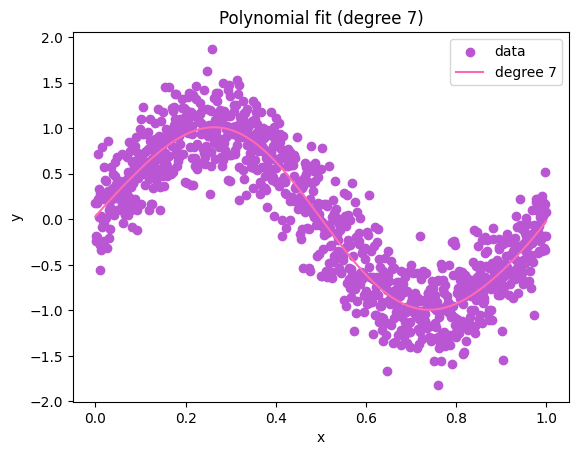

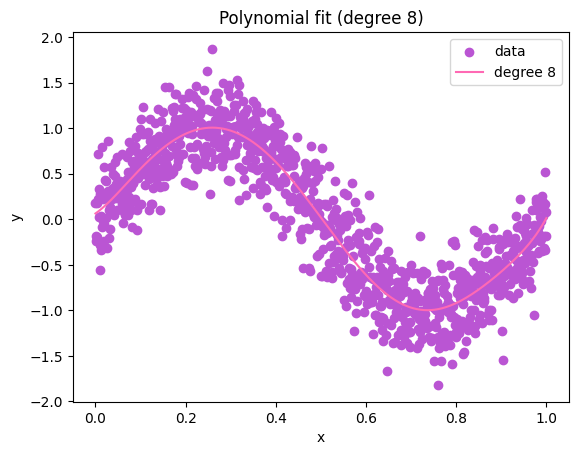

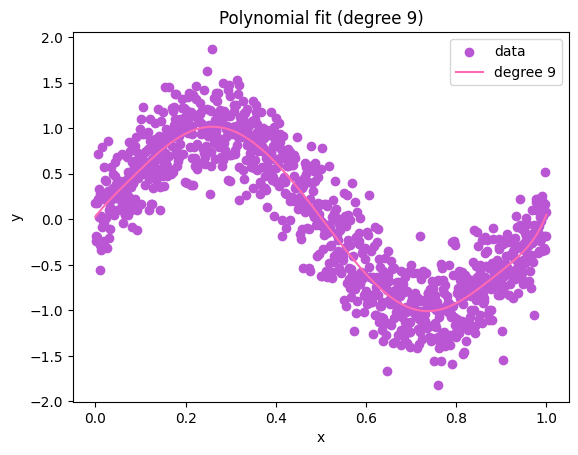

In [29]:
plot_polynomial(xvals_N3, noisy_yvals3)